# Lead Scoring Case Study

### Importing the dataset & relevant packages

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing all datasets
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Analyzing the dataset

In [4]:
# Check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [5]:
# Describing the data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Checking the data types of the columns
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Data Cleaning

In [7]:
# Columns to drop because they are redundant
columns = ["Prospect ID", "Lead Number", "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score",
           "Asymmetrique Profile Score", "I agree to pay the amount through cheque", "A free copy of Mastering The Interview",
           "Tags", "Lead Quality", "How did you hear about X Education", "City"]

In [8]:
# Removing all the redundant columns since they do not add any value
lead_data = lead_data.drop(columns, axis=1)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,No,No,Select,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,No,No,Select,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,No,No,Potential Lead,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,No,No,Select,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,No,No,Select,Modified


#### Finding out the columns which have 'Select' mentioned. Records having 'Select' imply that the person hasn't given any data for that field

In [9]:
# Creating a for loop and the required columns are appended into a new list
cols=list(lead_data.columns)
test=['Select']
text=[]
for i in range(len(cols)):
    if len(lead_data[cols[i]].isin(test).unique())>1:
        text.append(cols[i])
  
print(text)

['Specialization', 'Lead Profile']


The columns having the 'Select' label are 'Specialization' and 'Lead Profile'. Replacing them with null values.

In [10]:
# Replacing label 'Select' with nan values
df_1 = pd.DataFrame(lead_data['Specialization'])
df_2 = pd.DataFrame(lead_data['Lead Profile'])

In [11]:
# Replacing 'Select' label with nan values
df_1 = df_1.replace(df_1.loc[df_1['Specialization']=='Select'],value=np.nan)
df_2 = df_2.replace(df_2.loc[df_2['Lead Profile']=='Select'],value=np.nan)

In [12]:
# After replacing in temporary dataframe, we update our original dataset with new set of data from dataset df_1
lead_data['Specialization']=df_1['Specialization']
lead_data['Lead Profile']=df_2['Lead Profile']

#### Now that we have replaced them with null values, lets check the columns for missing values

In [13]:
# Adding up the missing values (column-wise)
lead_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [14]:
# Checking the percentage of missing values
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Dropping columns which have more than 30% missing values

In [15]:
# Droping Columns having more than 30% of missing values
drop_columns = lead_data.isnull().sum()
drop_columns = drop_columns[drop_columns.values/len(lead_data)>0.30]
len(drop_columns)

2

In [16]:
# Dropping 2 columns and checking the remaining columns for missing values
drop_columns = list(drop_columns.keys())
lead_data = lead_data.drop(drop_columns, 1)

In [17]:
# Checking the percentage of missing values
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### We have removed the 2 columns having more than 30% null values. We will impute the null values in the remaining columns with the value having maximum number of occurences.

In [18]:
# Lead Source column
lead_data['Lead Source'].value_counts().head(5)   # Lead Source column

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

In [19]:
# TotalVisits column
lead_data['TotalVisits'].value_counts().head(5)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [20]:
# Page Views Per Visit column
lead_data['Page Views Per Visit'].value_counts().head(5)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [21]:
# Last Activity column
lead_data['Last Activity'].value_counts().head(5)

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

In [22]:
# What is your current occupation column
lead_data['What is your current occupation'].value_counts().head(5)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

In [23]:
# What matters most to you in choosing a course
lead_data['What matters most to you in choosing a course'].value_counts().head(5)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
# Country column
lead_data['Country'].value_counts().head(5)

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
Name: Country, dtype: int64

In [25]:
# Imputing these values in our missing values dataset for respective categories
missing_values = {'Country':'India','Lead Source':'Google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed','What matters most to you in choosing a course':'Better Career Prospects'}

lead_data = lead_data.fillna(value = missing_values)

In [26]:
# Checking the percentage of missing values
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

#### Now, we don't have any more missing values in our dataset

In [27]:
lead_data['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
blog                    1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

#### We found that the column 'Lead Source' is having a label name 'Google' but in a different format too ('google'), so we need to change them to the same format.

In [28]:
# Applying lambda to captilize the first character of the column 'Lead Source'
lead_data['Lead Source']=lead_data['Lead Source'].apply(lambda x:x.capitalize())
lead_data['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Live chat               2
Social media            2
Press_release           2
Youtubechannel          1
Pay per click ads       1
Testone                 1
Blog                    1
Welearnblog_home        1
Nc_edm                  1
Welearn                 1
Name: Lead Source, dtype: int64

Now, all data labels are in good shape. We will now proceed to our next step, Data Transformation.

### Data Transformation

#### Assigning numerical variables to categories: 'Yes' to 1 and 'No' to 0

In [29]:
# Creating dictionary for two categories: Yes : 1 , No : 0
category={"No":0,"Yes":1}

# Column 'Do Not Email'
lead_data['Do Not Email']=lead_data['Do Not Email'].map(category)

# Column 'Do Not Call'
lead_data['Do Not Call']=lead_data['Do Not Call'].map(category)

# Column 'Search'
lead_data['Search']=lead_data['Search'].map(category)

# Column 'Magazine'
lead_data['Magazine']=lead_data['Magazine'].map(category)

# Column 'Newspaper Article'
lead_data['Newspaper Article']=lead_data['Newspaper Article'].map(category)

# Column 'X Education Forums'
lead_data['X Education Forums']=lead_data['X Education Forums'].map(category)

# Column 'Newspaper'
lead_data['Newspaper']=lead_data['Newspaper'].map(category)

# Column 'Digital Advertisement'
lead_data['Digital Advertisement']=lead_data['Digital Advertisement'].map(category)

# Column 'Through Recommendations'
lead_data['Through Recommendations']=lead_data['Through Recommendations'].map(category)

# Column 'Receive More Updates About Our Courses'
lead_data['Receive More Updates About Our Courses']=lead_data['Receive More Updates About Our Courses'].map(category)

# Column 'Update me on Supply Chain Content'
lead_data['Update me on Supply Chain Content']=lead_data['Update me on Supply Chain Content'].map(category)

# Column 'Get updates on DM Content'
lead_data['Get updates on DM Content']=lead_data['Get updates on DM Content'].map(category)

In [30]:
# Checking the data types of the columns
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null int64
Do Not Call                                      9240 non-null int64
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null object
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9240 non-null object
Last Activity                                    9240 non-null object
Country                                          9240 non-null object
What is your current occupation                  9240 non-null object
What matters most to you in choosing a course    9240 non-null object
Search                                           9240 non

#### Checking for redundant columns

In [31]:
# Checking if there are columns with one unique value since it won't affect our analysis
lead_data.nunique()

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        42
Total Time Spent on Website                      1731
Page Views Per Visit                              115
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [32]:
# Dropping unique valued columns
lead_data = lead_data.drop(['Magazine','Receive More Updates About Our Courses','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [33]:
# Checking data types of the columns
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null int64
Do Not Call                                      9240 non-null int64
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null object
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9240 non-null object
Last Activity                                    9240 non-null object
Country                                          9240 non-null object
What is your current occupation                  9240 non-null object
What matters most to you in choosing a course    9240 non-null object
Search                                           9240 non

We find some of the numerical values marked as 'object' datatype

In [34]:
# Converting some categories to numercial as they are imported as an 'Object'
lead_data['TotalVisits'] = pd.to_numeric(lead_data['TotalVisits'], errors='coerce')
lead_data['Page Views Per Visit'] = pd.to_numeric(lead_data['Page Views Per Visit'], errors='coerce')
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null int64
Do Not Call                                      9240 non-null int64
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9240 non-null float64
Last Activity                                    9240 non-null object
Country                                          9240 non-null object
What is your current occupation                  9240 non-null object
What matters most to you in choosing a course    9240 non-null object
Search                                           9240 n

### Performing EDA

#### There are many countries in the dataset, generalizing them into 2 categories: 'India' & 'Outside India' for ease of analysis

In [35]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    else:
        category = "outside india"
    return category

lead_data_temp = lead_data
lead_data_temp['Country'] = lead_data_temp.apply(lambda x:slots(x['Country']), axis = 1)
lead_data_temp['Country'].value_counts()

India            8953
outside india     287
Name: Country, dtype: int64

#### Univariate Analysis

#### Plotting the distribution for categorical variables

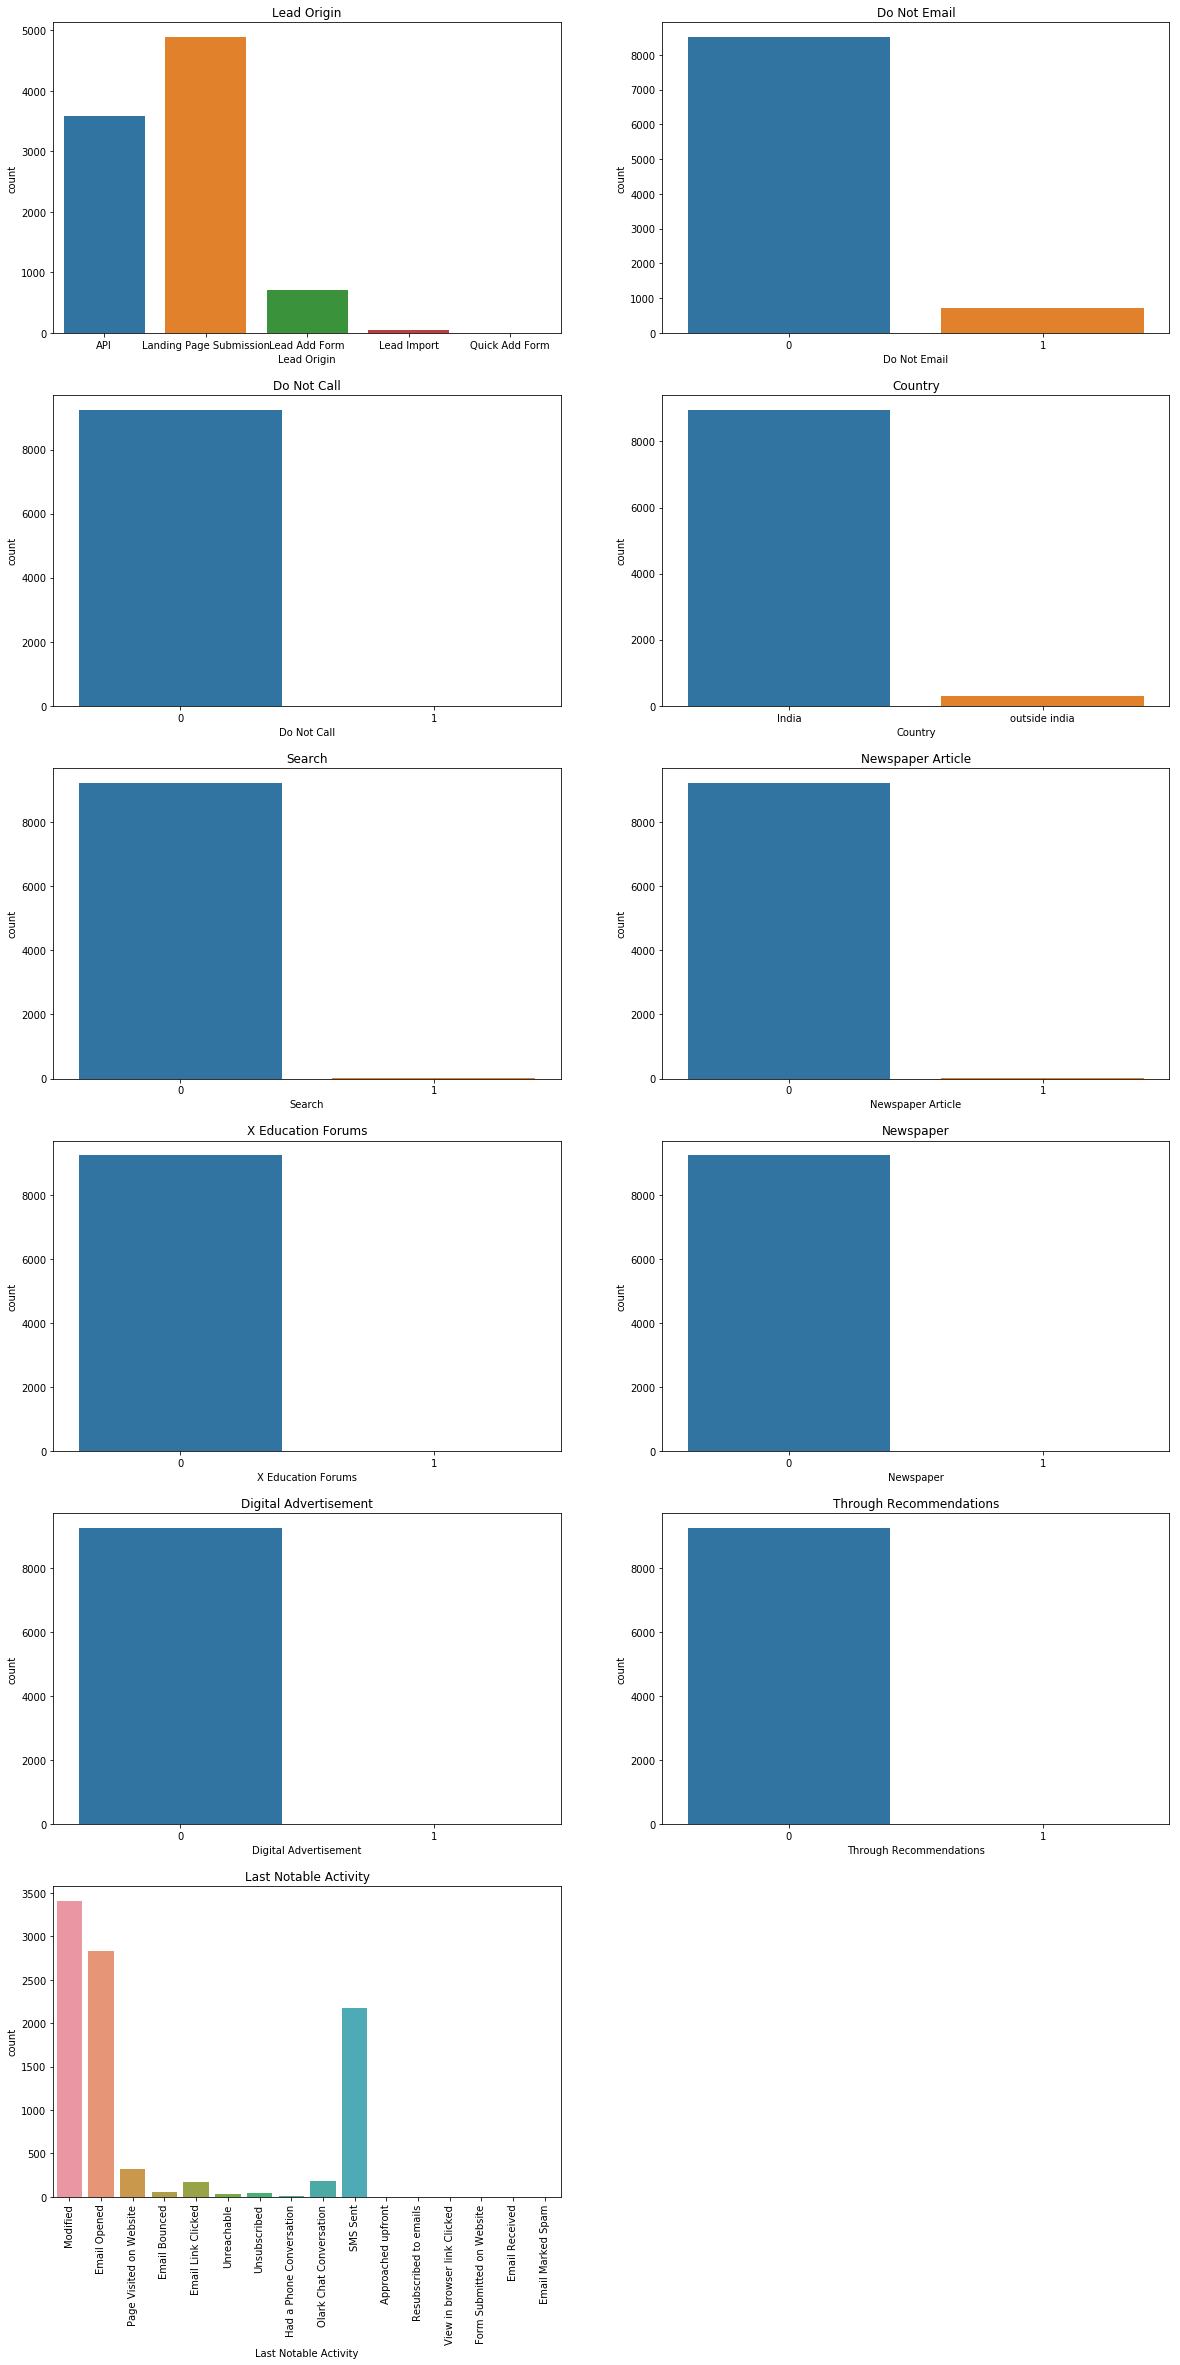

In [36]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead_data['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead_data['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(lead_data['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(lead_data_temp['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(lead_data['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(lead_data['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(lead_data['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(lead_data['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(lead_data['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(lead_data['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(lead_data['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

#### In summary, we can infer the following points from the above plots:
1. Most of the leads origin is 'Landing page submission'
2. Most leads have given the permit to 'Email' them about the course
3. Very few number of people are from outside of India.
4. Very few number of people have known about this course through newspaper articles and search. Most of them may have found out about this course through other sources.
5. Most of the student's last notable activity is a modification, the next in the list being 'Email Opened' and 'SMS sent'.

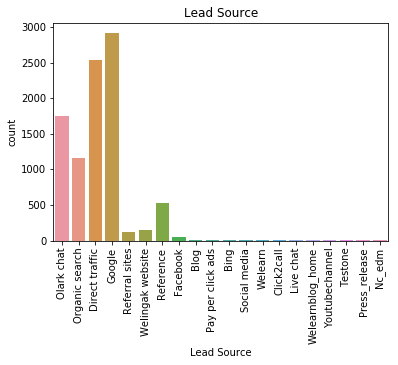

In [37]:
sns.countplot(lead_data['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

#### Inference from the above plot:
We can see that most of the leads have been found through Google

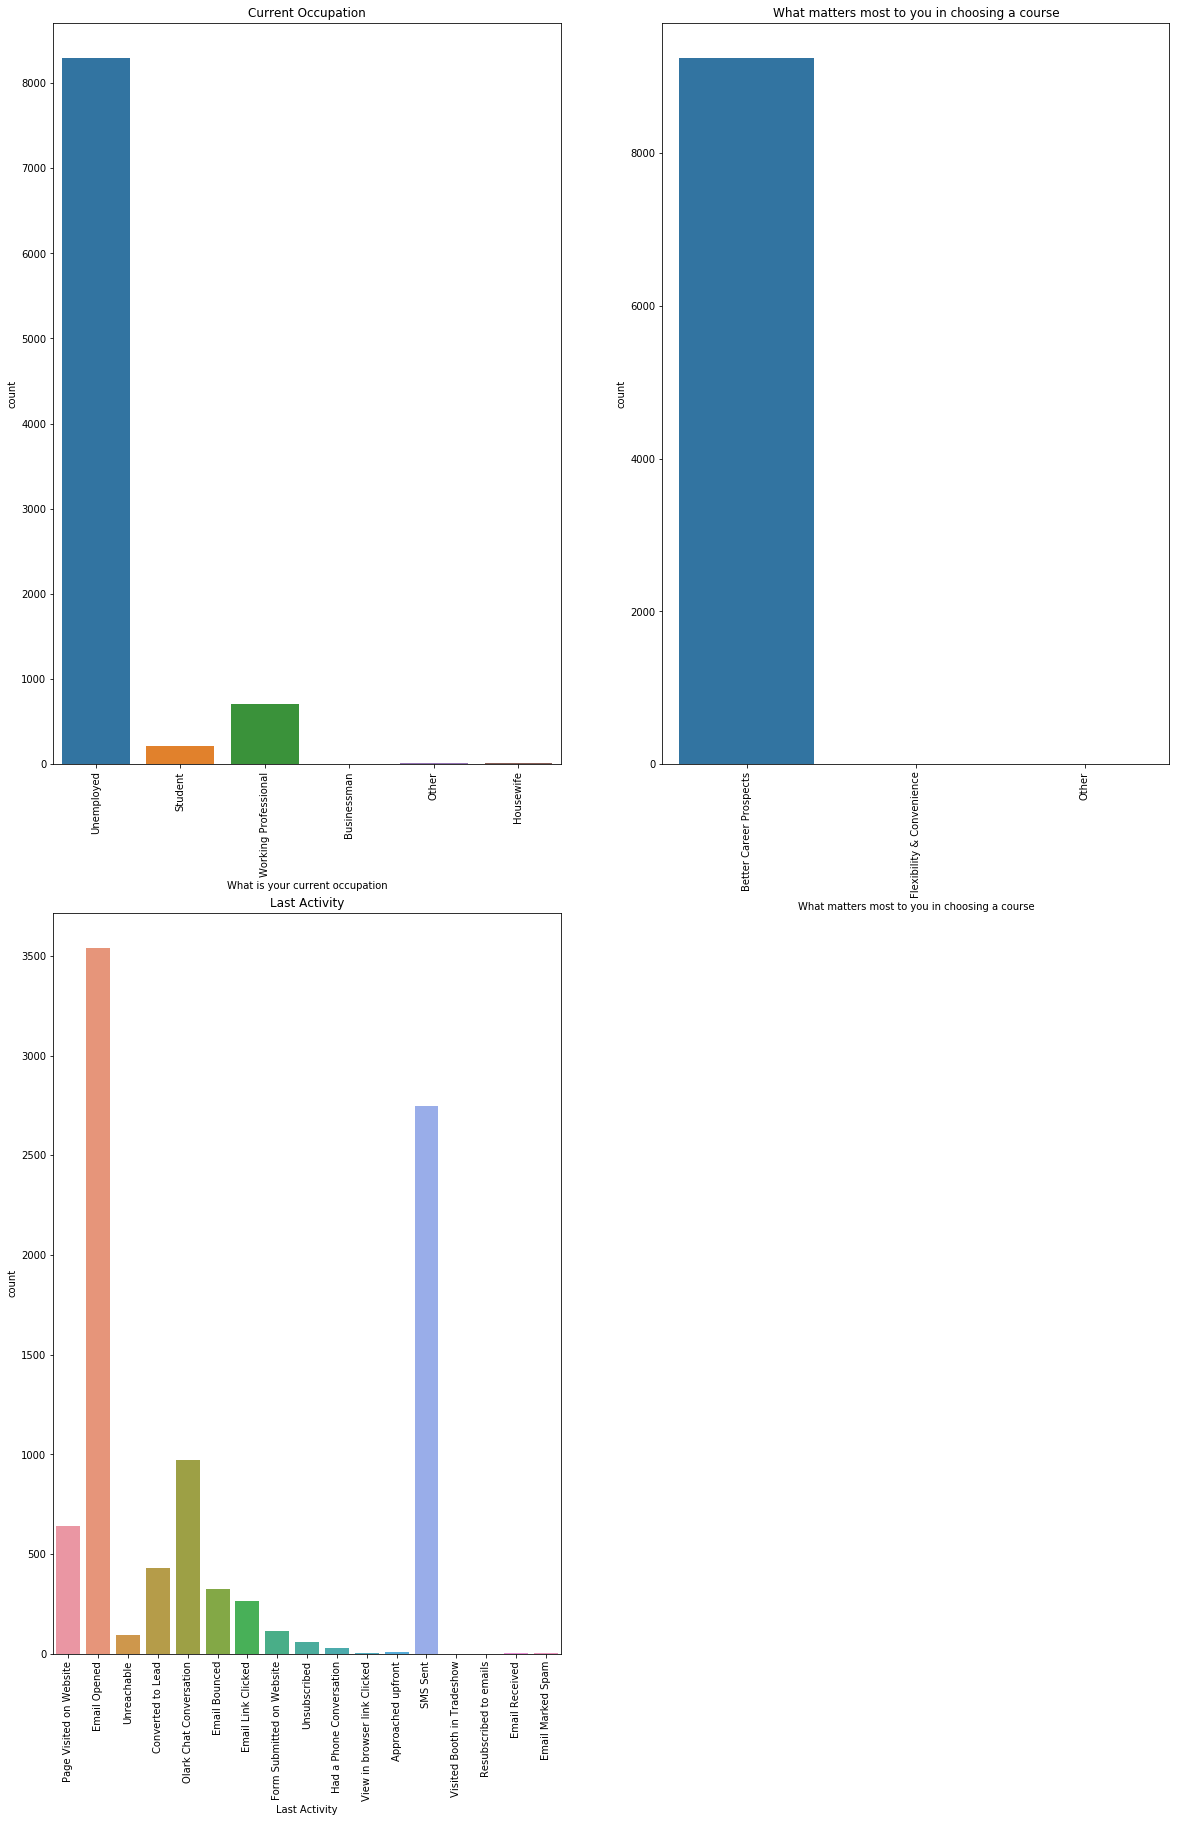

In [38]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(lead_data['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,2)
sns.countplot(lead_data['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,3)
sns.countplot(lead_data['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

#### Inferences from the above plot:
1. We see that most of the people who are interested in this course are unemployed and those who are businessmen are not interested at all.
2. Maximum number of people are interested in "Better Career Prospects" which is understandable as most people are unemployed and there are a few students and working professionals as well.
3. The Last Activity of most of the applicants is "Email Opened" and next one is "SMS Sent".

#### Plotting distribution fro numerical variables

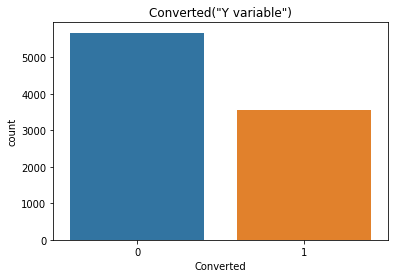

In [39]:
sns.countplot(lead_data['Converted'])
plt.title('Converted("Y variable")')
plt.show()

#### Inferences from the plot:
Most of the targeted leads haven't converted.

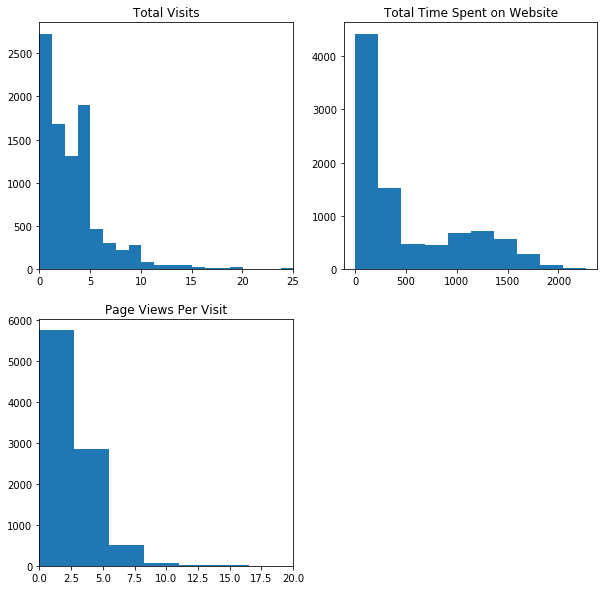

In [40]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

#### Inferences from the above plot:
1. Maximum number of people have visited 0 to 5 times and very few have visited the website more than 5 times.
2. The maximum time spent by the customers on the website is between 0 & 500, not many people have spent more time than that.
3. The highest number of people have average number of pages visited on the website between 0 & 2.5, there are a reasonable number between 2.5 & 5 too but very few people have and average above 5.

#### Relating all the categorical variables to Converted

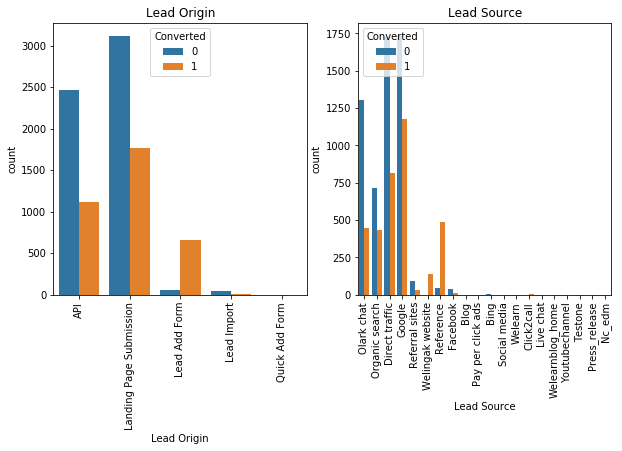

In [41]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

#### Inferences from the above plot:
1. The maximum number of non conversions are from "Landing Page Submission" but it has the maximum number of conversions too from the Lead Origins.
2. The "Lead Add Form" has more conversions than non conversions.
3. The Lead Source of "Direct Traffic" and "Google" have the maximum number of non conversions. But "Google" has the maximum number of converted too.

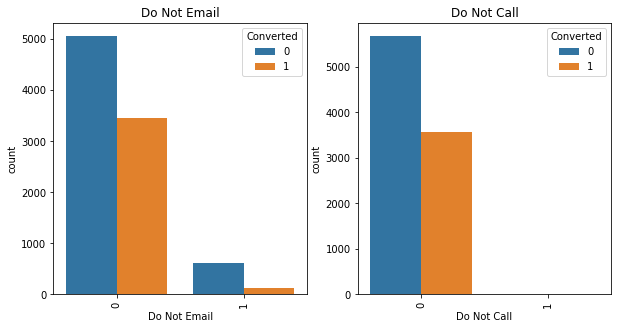

In [42]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

#### Inferences from the above plot:
1. Most of the people have told not to send email about the course and most of them have not converted. There are more numbers of converted also from this category compared to those who have told to mail them about the course.
2. None of the people have given permit to call them regarding the course. There are more people who haven't converted compared to those who have converted.

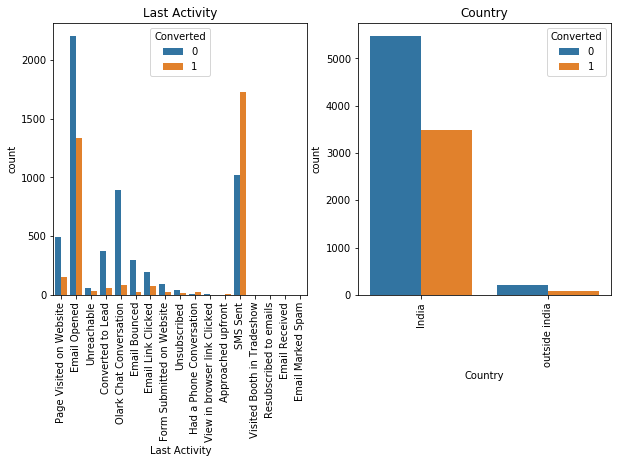

In [43]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead_data_temp).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

#### Inference from the above plots:
1. The maximum number of non conversions are from those whose last activity is "Email Opened". This category has a good number of conversions too.
2. The maximum number of conversions are from those whose last activity is "SMS Sent".
3. There are many applicants from India compared to other countries and they have more number of non conversions too.

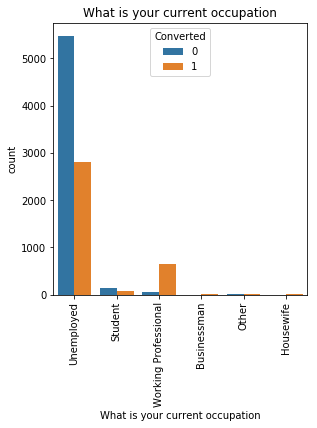

In [44]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

#### Inference from the above plots:
1. Most of the leads are unemployed and a high number of them haven't converted.
2. There are few working professionals who are leads and most of them have converted.

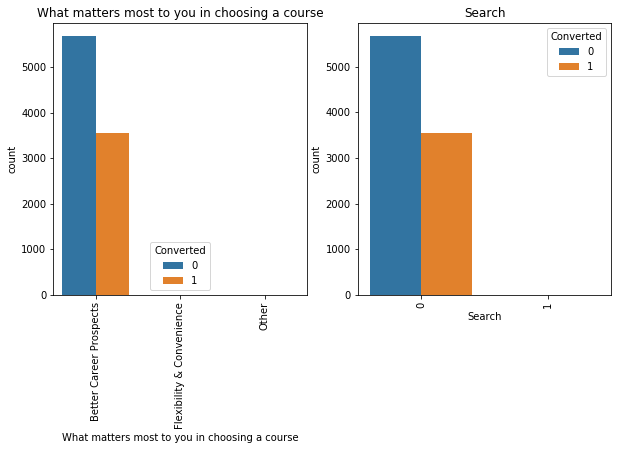

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

#### Inferences from the above plot:
1. All of the leads are looking for "Better Career Prospects" but most of them haven't converted.
2. None of the leads have come through a search and many of them haven't converted too.

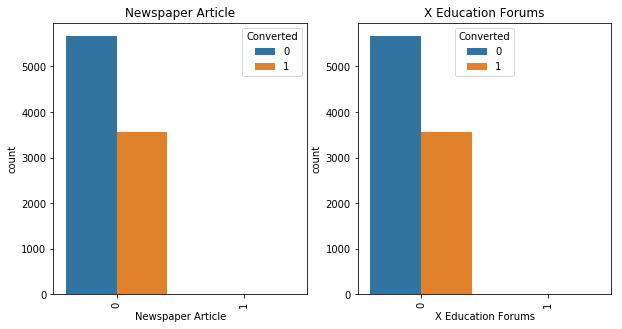

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

#### Inferences from the above plot:
1. None of the leads have come from newspaper articles and X Education forums.
2. Most of the leads haven't converted.

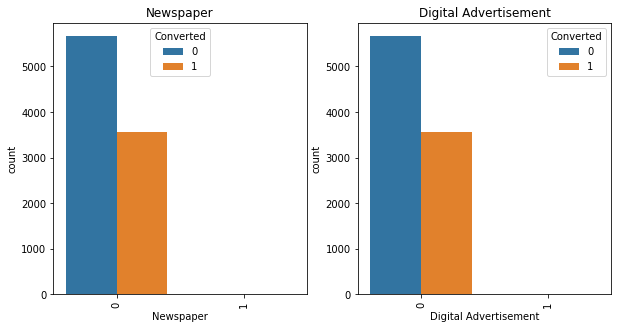

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

#### Inferences from the above plots:
1. None of the leads have come from newspapers or digital advertisements.
2. Most of them haven't converted too.

Text(0.5,1,'Through Recommendations')

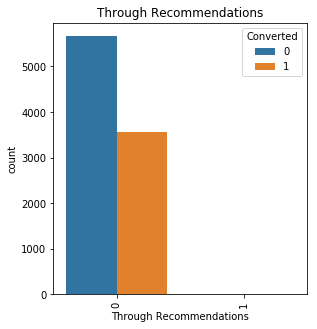

In [48]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

#### Inferences from the above plot:
None of them have come through recommendations and most haven't converted.

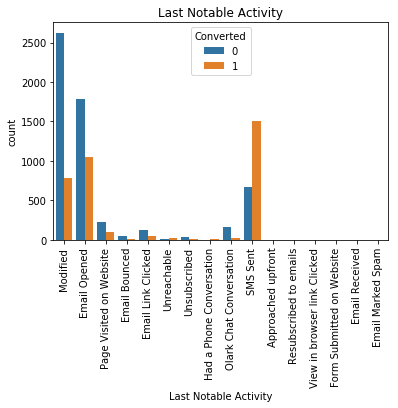

In [49]:

sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

#### Inferences from the above plot:
1. The last notable activity of the leads is a modification and most of them haven't converted.
2. The number of leads with last notable activity as "SMS Sent" is is less but the number of converted is more.

#### Bivariate Analysis

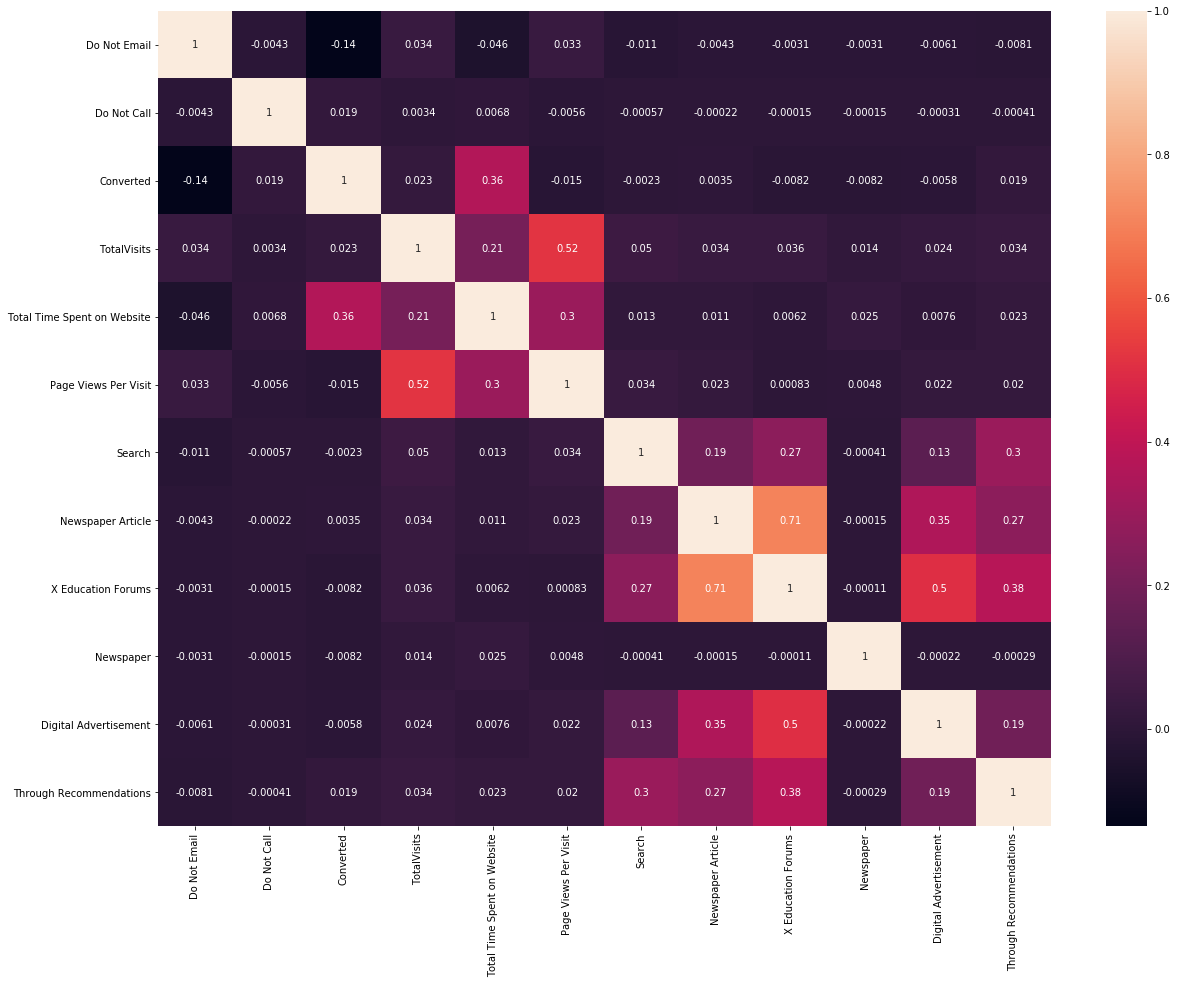

In [50]:
# Checking the above correlations with a heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(lead_data.corr(), annot = True)
plt.show()

#### Inferences from the above plot:
This plot confirms the inference from the pair plot. The highest correlation we can see is between 'Page views per visit' and 'TotalVisits' which also is not a very high value (0.52)

In [51]:
# Checking the column data types
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null int64
Do Not Call                                      9240 non-null int64
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9240 non-null float64
Last Activity                                    9240 non-null object
Country                                          9240 non-null object
What is your current occupation                  9240 non-null object
What matters most to you in choosing a course    9240 non-null object
Search                                           9240 n

#### We will use now dummy variables for mutiple levels of categories.

### Creating Dummy Variables

In [52]:
# Creating a dummy variables for 8 categories and dropping the first level.
dummy = pd.get_dummies(lead_data[['Lead Origin','Lead Source','Last Activity','What is your current occupation','Country',
                             'What matters most to you in choosing a course','Last Notable Activity']], drop_first=True)

# Adding these dummies to our original dataset
lead_data = pd.concat([lead_data,dummy],axis=1)
lead_data.shape

(9240, 81)

In [53]:
# We have created dummies for below categories hence removing the original column
duplicates = ['Lead Origin','Lead Source','Last Activity','What is your current occupation','Country',
            'What matters most to you in choosing a course','Last Notable Activity']
lead_data = lead_data.drop(duplicates,1)
lead_data.shape

(9240, 74)

In [54]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 74 columns):
Do Not Email                                                               9240 non-null int64
Do Not Call                                                                9240 non-null int64
Converted                                                                  9240 non-null int64
TotalVisits                                                                9240 non-null float64
Total Time Spent on Website                                                9240 non-null int64
Page Views Per Visit                                                       9240 non-null float64
Search                                                                     9240 non-null int64
Newspaper Article                                                          9240 non-null int64
X Education Forums                                                         9240 non-null int64
Newspaper                         

### Outlier Analysis

In [55]:
round(lead_data.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,...,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,...,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,...,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35%,0.00,0.00,0.00,2.00,98.00,1.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,3.00,248.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
55%,0.00,0.00,0.00,3.00,305.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,5.00,936.00,3.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
95%,1.00,0.00,1.00,10.00,1562.00,6.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


We can see that there are outliers in 2 variables 'TotalVisits' and 'Page Views Per Visit'.

C:\Users\ramra\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ramra\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ramra\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


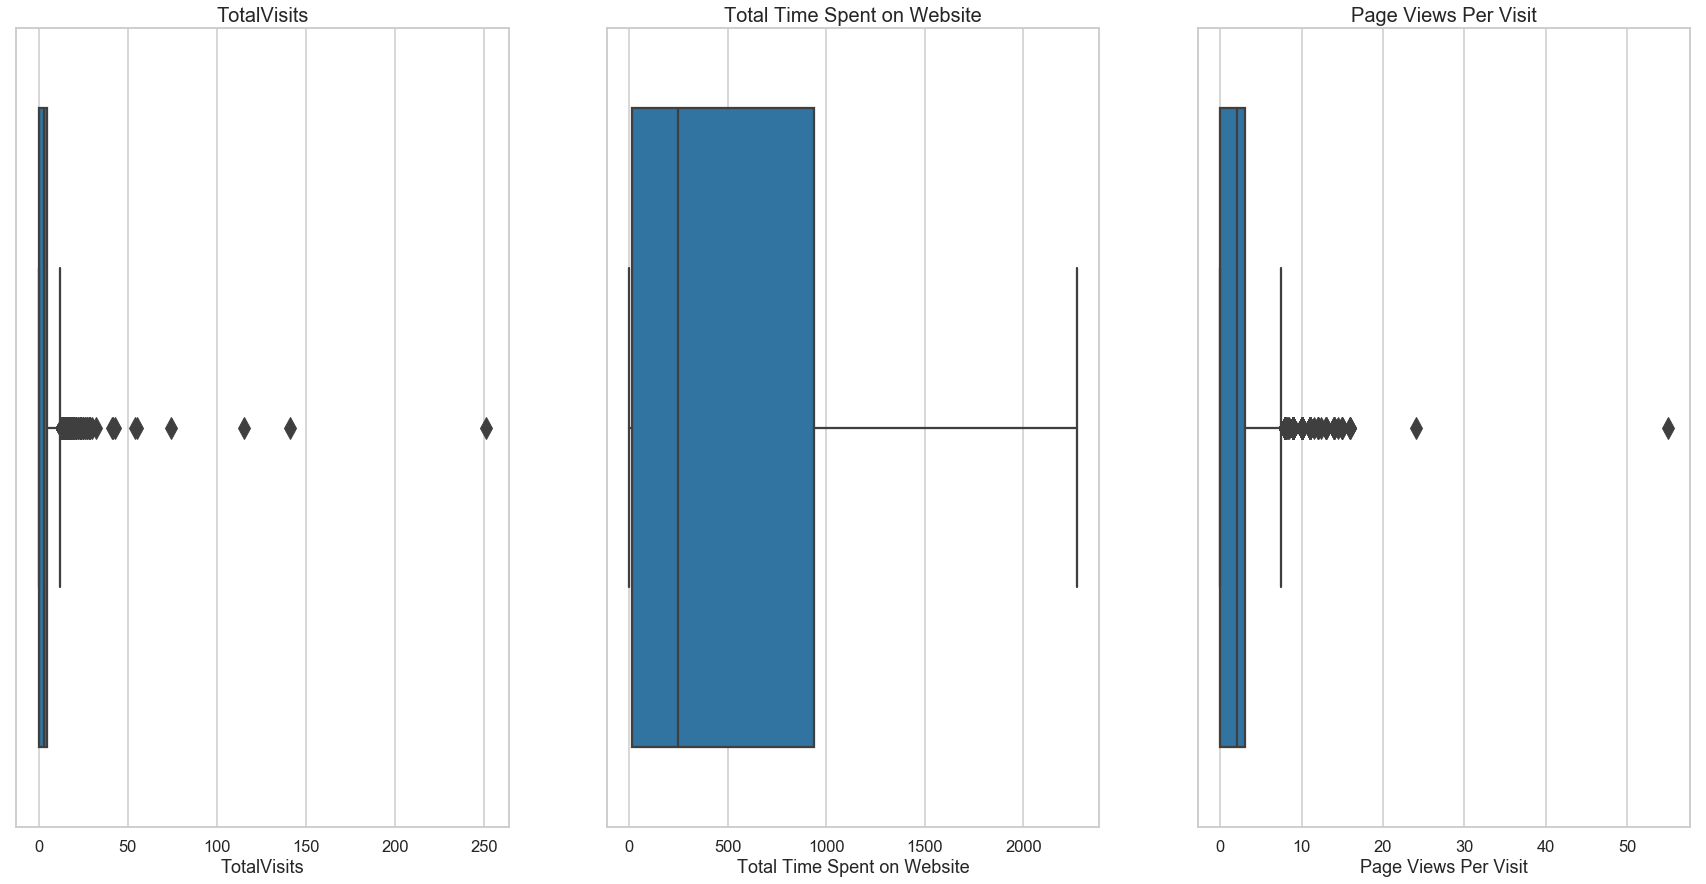

In [56]:
# Setting size of figure, context and gridlines
plt.figure(figsize=(30,50))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Title names for the columns in the dataset
columns = {0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(columns[i],fontsize=20)
    sns.boxplot(x = lead_data[columns[i]], data = lead_data, orient='v', fliersize = 15)

#### Inferences from the above plot:
From the above boxplots we can now confirm that we have two outlier variables in our dataset ('TotalVisits' and 'Page Views Per Visit'). Now as per business requirement we cannot drop these outliers because it may impact our analysis/model so we will create bins for these two outliers.

### Creating Bins

In [57]:
# For 'TotalVisits' variable, as we have range from 0 to 251 for'TotalVisits' variable
ranges = {'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Assigning '1' or '0' to each bins
for i in range(len(list(ranges.keys()))):
    lead_data[list(ranges.keys())[i]] = lead_data['TotalVisits'].map(lambda x: 1 if (x < list(ranges.values())[i] and x >= (list(ranges.values())[i] - 50)) else 0)

In [58]:
# For 'Page Views Per Visit' variable, as we have range from 0 to 55 for'Page Views Per Visit' variable
ranges={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assigning '1' or '0' to each bins
for i in range(len(list(ranges.keys()))):
    lead_data[list(ranges.keys())[i]] = lead_data['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges.values())[i] and x >= (list(ranges.values())[i] - 10)) else 0)

In [59]:
lead_data.shape

(9240, 86)

#### Checking for redundant variables

In [60]:
lead_data['TotalVisits_150_200'].value_counts()

0    9240
Name: TotalVisits_150_200, dtype: int64

In [61]:
lead_data['TotalVisits_200_250'].value_counts()

0    9240
Name: TotalVisits_200_250, dtype: int64

In [62]:
lead_data['Page Views Per Visit_30_40'].value_counts()

0    9240
Name: Page Views Per Visit_30_40, dtype: int64

In [63]:
lead_data['Page Views Per Visit_40_50'].value_counts()

0    9240
Name: Page Views Per Visit_40_50, dtype: int64

#### Removing the above redundant variables

In [64]:
redundant = ['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']
lead_data = lead_data.drop(redundant, axis=1)
lead_data.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


### Data Preparation

#### Creating the train-test split

In [65]:
# Importing relevant libraries
from sklearn.model_selection import train_test_split

In [66]:
# Separating target varaible from dependent variable
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [67]:
# Putting dependent variable in a new dataset called 'X'
X = lead_data.drop('Converted', 1)
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,305,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1428,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [68]:
# Splitting the datset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling/Standardization

In [69]:
# Importing Standard Scaler method from sklearn - preprocessing library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  # Creating an object

In [70]:
# Now, Scalling the 'Total Time Spent on Website' variables with standard scaler and fitting
X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [71]:
## Checking the conversion rate from 'converted' column as it denotes the target variable
(sum(y)/len(y.index))*100

38.53896103896104

We have conversion rate of almost 39%

### Building a Logistic Regression Model

In [72]:
# Importing necessary libraries
import statsmodels.api as sm

In [73]:
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()

In [74]:
logis=sm.GLM(y_train, X_train_lm,familt=sm.families.Binomial())
logis.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6395
Model Family:                Gaussian   Df Model:                           72
Link Function:               identity   Scale:                         0.13684
Method:                          IRLS   Log-Likelihood:                -2708.8
Date:                Mon, 08 Feb 2021   Deviance:                       875.12
Time:                        20:56:07   Pearson chi2:                     875.
No. Iterations:                     3   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    6.969e+11   9.84e+11      0.708      0.479   -1.23e+12    2.62e+12
Do Not Email                                                               -0.1228      0.025     -5.005      0.000      -0.171      -0.075
Do Not Call                                                                 0.4912      0.262      1.874      0.061      -0.022       1.005
Total Time Spent on Website                                                 0.1833      0.005     35.120      0.000       0.173       0.193
Search                                                                      0.0871      0.121      0.717      0.473      -0.151       0.325
Newspaper Article                                                           0.6314      0.371      1.704      0.088      -0.095       1.358
X Education Forums                                                         -0.7006      0.611     -1.147      0.251      -1.898       0.497
Newspaper                                                                  -0.6878      0.370     -1.857      0.063      -1.414       0.038
Digital Advertisement                                                      -0.3837      0.262     -1.465      0.143      -0.897       0.130
Through Recommendations                                                     0.1417      0.157      0.900      0.368      -0.167       0.450
Lead Origin_Landing Page Submission                                        -0.0248      0.014     -1.823      0.068      -0.051       0.002
Lead Origin_Lead Add Form                                                   0.4840      0.071      6.791      0.000       0.344       0.624
Lead Origin_Lead Import                                                     0.1721      0.265      0.650      0.516      -0.347       0.691
Lead Origin_Quick Add Form                                                  0.3414      0.371      0.919      0.358      -0.387       1.069
Lead Source_Blog                                                           -0.4518      0.427     -1.057      0.290      -1.289       0.386
Lead Source_Click2call                                                     -0.1320      0.311     -0.425      0.671      -0.741       0.477
Lead Source_Direct traffic                                                 -0.1466      0.214     -0.685      0.493      -0.566       0.273
Lead Source_Facebook                                                       -0.3165      0.340     -0.930      0.352      -0.983       0.350
Lead Source_Google                                                         -0.0935      0.214     -0.437      0.662      -0.513       0.326
Lead Source_Live chat                                                       0.0328

#### Using RFE

In [75]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [76]:
# Creating an object
logreg = LogisticRegression()

In [77]:
# Running rfe for 15 variables
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)   # fitting

In [78]:
rfe.support_  # checking for ture and false assigned to the variables after rfe

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False])

In [79]:
# Selecting columns which are 'True' in rfem.support_
cols=X_train.columns[rfe.support_]
X_train_1=sm.add_constant(X_train[cols])    # Adding constant

In [80]:
# Creating 1st model after RFE
log1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
reg1=log1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.9
Date:                Mon, 08 Feb 2021   Deviance:                       5391.7
Time:                        20:56:13   Pearson chi2:                 7.48e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3827      0.052    -26.814      0.000      -1.484      -1.282
Do Not Email                                            -1.1259      0.190     -5.939      0.000      -1.497      -0.754
Total Time Spent on Website                              1.0945      0.039     27.888      0.000       1.018       1.171
Lead Origin_Lead Add Form                                3.6899      0.190     19.386      0.000       3.317       4.063
Lead Source_Olark chat                                   1.1407      0.102     11.190      0.000       0.941       1.340
Lead Source_Welingak website                             1.9267      0.743      2.595      0.009       0.471       3.382
Last Activity_Converted to Lead                         -1.2553      0.218     -5.760      0.000      -1.682      -0.828
Last Activity_Email Bounced                             -1.5582      0.422     -3.694      0.000      -2.385      -0.731
Last Activity_Had a Phone Conversation                   0.3881      0.944      0.411      0.681      -1.462       2.238
Last Activity_Olark Chat Conversation                   -1.3867      0.163     -8.520      0.000      -1.706      -1.068
What is your current occupation_Housewife               22.9380   1.37e+04      0.002      0.999   -2.68e+04    2.68e+04
What is your current occupation_Working Professional     2.7989      0.187     14.943      0.000       2.432       3.166
Last Notable Activity_Email Bounced                      1.8537      0.602      3.079      0.002       0.674       3.034
Last Notable Activity_Had a Phone Conversation           3.2110      1.447      2.218      0.027       0.374       6.048
Last Notable Activity_SMS Sent                           1.4616      0.079     18.545      0.000       1.307       1.616
Last Notable Activity_Unreachable                        1.7764      0.513      3.464      0.001       0.771       2.782
========================================================================================================================
"""

We can see from the above model that certain variable have a high p-value signifying that they aren't very significant variables for our analysis.

#### Calculating VIF

In [81]:
# Importing VIF's library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Creating VIF dataframe
vif=pd.DataFrame()

# Adding same features as the x_train dataset have
vif['Features']=X_train_1[cols].columns

# Caculating VIFs
vif['VIF']=[variance_inflation_factor(X_train_1[cols].values,i) for i in range(X_train_1[cols].shape[1])]

# Rounding the vif values
vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values
vif=vif.sort_values(by='VIF',ascending=False)

vif

,Features,VIF
7,Last Activity_Had a Phone Conversation,2.02
12,Last Notable Activity_Had a Phone Conversation,2.00
6,Last Activity_Email Bounced,1.94
0,Do Not Email,1.77
3,Lead Source_Olark chat,1.54
2,Lead Origin_Lead Add Form,1.41
8,Last Activity_Olark Chat Conversation,1.36
4,Lead Source_Welingak website,1.24
1,Total Time Spent on Website,1.22
11,Last Notable Activity_Email Bounced,1.21


We can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.

We will drop the highest in-significant feature ('What is your current occupation_Housewife') having 0.999 p-value.

In [83]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant
X_train_2=X_train_1.drop(['const','What is your current occupation_Housewife'],1)

In [84]:
# Creating a new model
X_train_2=sm.add_constant(X_train_2)                              # Adding constant
log2=sm.GLM(y_train,X_train_2,families=sm.families.Binomial())  # Using GLM, creating model
reg2=log2.fit()                                                 # Fitting our model
reg2.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.13886
Method:                          IRLS   Log-Likelihood:                -2785.4
Date:                Mon, 08 Feb 2021   Deviance:                       896.07
Time:                        20:56:14   Pearson chi2:                     896.
No. Iterations:                     3   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2527      0.007     36.547      0.000       0.239       0.266
Do Not Email                                            -0.1428      0.022     -6.378      0.000      -0.187      -0.099
Total Time Spent on Website                              0.1860      0.005     35.851      0.000       0.176       0.196
Lead Origin_Lead Add Form                                0.5411      0.020     27.164      0.000       0.502       0.580
Lead Source_Olark chat                                   0.1640      0.014     11.583      0.000       0.136       0.192
Lead Source_Welingak website                             0.1952      0.043      4.491      0.000       0.110       0.280
Last Activity_Converted to Lead                         -0.1426      0.023     -6.293      0.000      -0.187      -0.098
Last Activity_Email Bounced                             -0.0837      0.034     -2.464      0.014      -0.150      -0.017
Last Activity_Had a Phone Conversation                   0.0630      0.113      0.559      0.576      -0.158       0.284
Last Activity_Olark Chat Conversation                   -0.1710      0.017     -9.887      0.000      -0.205      -0.137
What is your current occupation_Working Professional     0.3448      0.018     19.039      0.000       0.309       0.380
Last Notable Activity_Email Bounced                      0.1056      0.065      1.631      0.103      -0.021       0.232
Last Notable Activity_Had a Phone Conversation           0.4250      0.159      2.671      0.008       0.113       0.737
Last Notable Activity_SMS Sent                           0.2550      0.011     22.238      0.000       0.232       0.277
Last Notable Activity_Unreachable                        0.3083      0.082      3.780      0.000       0.148       0.468
========================================================================================================================
"""

We will drop the highest in-significant feature ('Last Activity_Had a Phone Conversation') having 0.576 p-value.

In [85]:
# Dropping the most insignificant values ('Last Activity_Had a Phone Conversation') and constant
X_train_3=X_train_2.drop(['const','Last Activity_Had a Phone Conversation'],1)

In [86]:
# Recreating a new model
X_train_3=sm.add_constant(X_train_3)                                # Adding constant
log3=sm.GLM(y_train,X_train_3,families=sm.families.Binomial())    # Using GLM, creating model
reg3=log3.fit()                                                   # Fitting our model
reg3.summary()                                                      # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.13885
Method:                          IRLS   Log-Likelihood:                -2785.5
Date:                Mon, 08 Feb 2021   Deviance:                       896.11
Time:                        20:56:14   Pearson chi2:                     896.
No. Iterations:                     3   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2528      0.007     36.584      0.000       0.239       0.266
Do Not Email                                            -0.1426      0.022     -6.372      0.000      -0.186      -0.099
Total Time Spent on Website                              0.1861      0.005     35.865      0.000       0.176       0.196
Lead Origin_Lead Add Form                                0.5415      0.020     27.208      0.000       0.503       0.581
Lead Source_Olark chat                                   0.1639      0.014     11.581      0.000       0.136       0.192
Lead Source_Welingak website                             0.1948      0.043      4.482      0.000       0.110       0.280
Last Activity_Converted to Lead                         -0.1428      0.023     -6.300      0.000      -0.187      -0.098
Last Activity_Email Bounced                             -0.0840      0.034     -2.473      0.013      -0.150      -0.017
Last Activity_Olark Chat Conversation                   -0.1711      0.017     -9.893      0.000      -0.205      -0.137
What is your current occupation_Working Professional     0.3453      0.018     19.090      0.000       0.310       0.381
Last Notable Activity_Email Bounced                      0.1056      0.065      1.631      0.103      -0.021       0.232
Last Notable Activity_Had a Phone Conversation           0.4878      0.113      4.334      0.000       0.267       0.708
Last Notable Activity_SMS Sent                           0.2547      0.011     22.234      0.000       0.232       0.277
Last Notable Activity_Unreachable                        0.3081      0.082      3.778      0.000       0.148       0.468
========================================================================================================================
"""

We will drop the highest in-significant feature ('Last Notable Activity_Email Bounced') having 0.103 p-value.

In [87]:
# Dropping the most insignificant values ('Last Activity_Had a Phone Conversation') and constant
X_train_4=X_train_3.drop(['const','Last Notable Activity_Email Bounced'],1)

In [88]:
# Recreating a new model
X_train_4=sm.add_constant(X_train_4)                                # Adding constant
log4=sm.GLM(y_train,X_train_4,families=sm.families.Binomial())    # Using GLM, creating model
reg4=log4.fit()                                                   # Fitting our model
reg4.summary()                                                      # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.13888
Method:                          IRLS   Log-Likelihood:                -2786.8
Date:                Mon, 08 Feb 2021   Deviance:                       896.48
Time:                        20:56:17   Pearson chi2:                     896.
No. Iterations:                     3   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2528      0.007     36.577      0.000       0.239       0.266
Do Not Email                                            -0.1419      0.022     -6.340      0.000      -0.186      -0.098
Total Time Spent on Website                              0.1862      0.005     35.891      0.000       0.176       0.196
Lead Origin_Lead Add Form                                0.5411      0.020     27.184      0.000       0.502       0.580
Lead Source_Olark chat                                   0.1638      0.014     11.574      0.000       0.136       0.192
Lead Source_Welingak website                             0.1962      0.043      4.516      0.000       0.111       0.281
Last Activity_Converted to Lead                         -0.1427      0.023     -6.299      0.000      -0.187      -0.098
Last Activity_Email Bounced                             -0.0666      0.032     -2.066      0.039      -0.130      -0.003
Last Activity_Olark Chat Conversation                   -0.1710      0.017     -9.884      0.000      -0.205      -0.137
What is your current occupation_Working Professional     0.3454      0.018     19.097      0.000       0.310       0.381
Last Notable Activity_Had a Phone Conversation           0.4878      0.113      4.333      0.000       0.267       0.708
Last Notable Activity_SMS Sent                           0.2547      0.011     22.227      0.000       0.232       0.277
Last Notable Activity_Unreachable                        0.3081      0.082      3.778      0.000       0.148       0.468
========================================================================================================================
"""

From the above summary, we can say that all the variables present in this model are significant as no variables is having p-value greater than 5% hence we can proceed with our next step of calculating VIF

#### Calculating VIF

We found that there are no in-significant variables in the final model and there wasn't any multicollinearity too initially, but we check for multicollinearity again just for confirmation sake.

In [89]:
# Checking VIF again just to be sure
X_train_4_1=X_train_4.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features']=X_train_4_1.columns       # Adding final train dataset features

# Now calculating
vif['VIF']=[variance_inflation_factor(X_train_4_1.values,i) for i in range(X_train_4_1.shape[1])]

# Rounding the vif values
vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset
vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
0,Do Not Email,1.77
6,Last Activity_Email Bounced,1.75
3,Lead Source_Olark chat,1.54
2,Lead Origin_Lead Add Form,1.40
7,Last Activity_Olark Chat Conversation,1.36
4,Lead Source_Welingak website,1.24
1,Total Time Spent on Website,1.22
10,Last Notable Activity_SMS Sent,1.18
8,What is your current occupation_Working Profes...,1.16
5,Last Activity_Converted to Lead,1.00


As confirmed earlier, there is no sign of multicollinearity shown in the above vif dataframe, hence this is our final model and we are going to use it for prediction.

### Performing predictions on the train set

In [90]:
# Predicting the train dataset with our final model
y_train_pred=reg4.predict(X_train_4)

# Creating a new dataset and saving predicted values in it
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
1871,0,0.251821,1871
6795,0,0.253883,6795
3516,0,0.287932,3516
8105,0,0.761664,8105
3934,0,0.251821,3934


### Plotting the ROC curve

In [91]:
# Importing necessary libraries for roc curve
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

In [92]:
# Creating a function to plot roc curve with auc score
def lead_roc( real, probability ):
    # Creating roc curve values like false positive rate , true positive rate and threshold
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    plt.legend(loc="lower right")
    
    # Showing the plot
    plt.show()

    return None   # no return

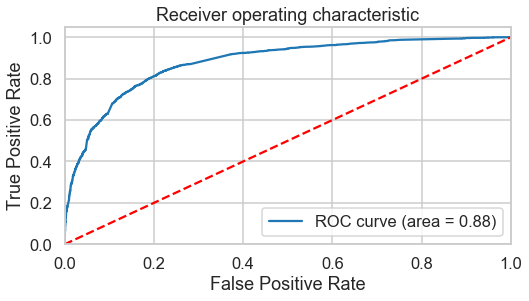

In [93]:
# Calling the roc curve for plotting
lead_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

#### Inferences from the ROC curve:
1. The curve is closer to the left side of the border and hence we can say that our model is having a very good accuracy.
2. The area under the curve is 88% of the total area.

### Finding optimal probability cutoff point

In [94]:
# creating 10 points out of which one we will choose for our cutoff point
numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.251821,1871,1,1,1,0,0,0,0,0,0,0
6795,0,0.253883,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.287932,3516,1,1,1,0,0,0,0,0,0,0
8105,0,0.761664,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.251821,3934,1,1,1,0,0,0,0,0,0,0


Now, let's check the possibilities of choosing any one points from 0 to 0.9. We will do this by finding 'Accuracy', 'Sensitivity' and 'Specificity' for each of the points. These three methods will tell us how good our model is, whether it is having low accuray or high or number of relevance data points is high or low and so on.

#### Caculating accuracy, sensitivity and specificity with probability cutoffs

In [95]:
# Importing necessary library
from sklearn.metrics import confusion_matrix

In [96]:
# Creating a dataframe to store all the values to be created
df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1
var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.434292    0.996756     0.087706
0.1          0.1  0.555659    0.978508     0.295102
0.2          0.2  0.697434    0.933901     0.551724
0.3          0.3  0.789889    0.859286     0.747126
0.4          0.4  0.807514    0.792782     0.816592
0.5          0.5  0.811534    0.682482     0.891054
0.6          0.6  0.786487    0.531630     0.943528
0.7          0.7  0.749227    0.390916     0.970015
0.8          0.8  0.722325    0.297242     0.984258
0.9          0.9  0.681509    0.173560     0.994503


As we can see from the above data, we have created points for accuracy, sensitivity and specificity for all probability points from 0 to 0.9. Out of this, we can choose a cutoff point as 0.4 because the accuracy, sensitivity and specificity are having nearly same value which is an ideal point to consider.

Let's plot this data and see the convergent point or meeting point for all three point 'accuracy' , 'sensitivity' and 'specificity'

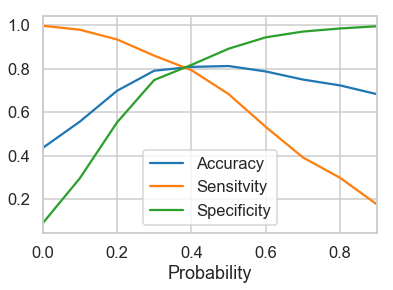

In [97]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).
df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.show()

From the above curve, 0.4 is the optimum point for taking probability cutoff. The meeting point is slightly before from 0.4 and hence we can choose this as our final cutoff. Also, we can see that there is a trade off between sensitivity and specificity.

#### Running the predictions again with a probability cutoff of 0.4

In [98]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset
y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.251821,1871,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.253883,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.287932,3516,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.761664,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.251821,3934,1,1,1,0,0,0,0,0,0,0,0


### Calculating Precision and Recall

In [99]:
# Creating confusion matrix to find precision and recall score
confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[3268,  734],
       [ 511, 1955]], dtype=int64)

In [100]:
print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))    # Printing Pecision score
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       # Printing Recall score

Precision 0.72703607288955
Recall 0.7927818329278183


#### Important inferences from the outcomes of precision and recall score:
1. Our precison percentage is 73% approximately and recall percentage is 79% approximately
2. This means we have very good model which explains relevancy of 73% and true relevant results about 79%.

For our business objective, I will consider the recall percentage as more valuable. It is okay if our precision is little low which means less hot lead customers but we don't want to leave out any hot leads which are willing to get converted. Hence, our focus on this will be more on Recall than Precision.

### Precision and Recall trade-off

We all know that Precision and Recall are inversely related which means if one increases other will genuinely decrease. Hence, we need to see the trade off between these two.

In [101]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

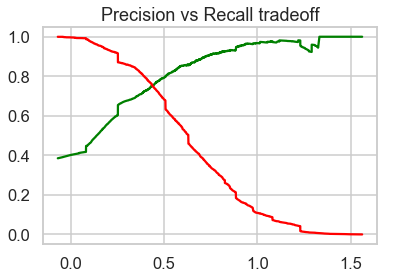

In [102]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

We can see that there is a trade off between Precision and Recall and the meeting point is nearly at 0.5

### Performing predictions on the test set

#### Scaling the dataset

In [103]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler
X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

#### Performing the predictions

In [104]:
# Predicting the test dataset with our final model
test_cols=X_train_4.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=reg4.predict(X_test_final)       # Predicting the final test set

In [105]:
# Creating a new dataset and saving the prediction values in it
y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})
y_test_pred_final.head()

,Converted,Converted_Probability,ID
4269,1,0.687057,4269
2376,1,0.883713,2376
7766,1,0.761641,7766
9199,0,0.080847,9199
4359,1,0.629051,4359


In [106]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final test dataset
y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.687057,4269,1
2376,1,0.883713,2376,1
7766,1,0.761641,7766,1
9199,0,0.080847,9199,0
4359,1,0.629051,4359,1


### Evaluating the model

In [107]:
# Checking the accuracy of the test dataset
from sklearn import metrics
print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the score

Accuracy score in predicting test dataset : 0.8196248196248196


In [108]:
# Checking the precision and recall of the test dataset
from sklearn.metrics import precision_score, recall_score
print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the precision score
print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))      # Printing the recall score

Precision score in predicting test dataset: 0.7580225498699046
Recall score in predicting test dataset: 0.7981735159817351


### Lead Score Assigning

In [109]:
# Creating new columns for lead number and lead score
y_test_pred_final['Lead Number']=lead_data.iloc[y_test_pred_final['ID'],1]
y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.687057,4269,1,0,69
2376,1,0.883713,2376,1,0,88
7766,1,0.761641,7766,1,0,76
9199,0,0.080847,9199,0,0,8
4359,1,0.629051,4359,1,0,63


### Conclusion

#### Valuable Inferences:
1. The Accuracy, Precision and Recall score we got from test set are in an aceptable range.
2. We have high recall score than precision score which is what we were looking for.
3. The model is in a stable state which means that this model has an ability to adjust with the company’s requirements in the coming future.
4. Important features responsible for good conversion rate or the ones which contributes more towards the probability of a lead getting converted are: 
    1. Lead Origin_Lead Add Form
    2. What is your current occupation_Working Professional
    3. Last Notable Activity_Had a Phone Conversation